In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
# dict of subjects (keys) and the list of publications they appear in (values).
types = json.load(open('../../../data/json/dim/all/relevant_types.json'))
type_clusters = json.load(open('../../oai_dc/types/clustered_types.json'))
depositonce = json.load(open('../../../data/json/dim/depositonce/relevant_subjects_reversed.json'))
edoc = json.load(open('../../../data/json/dim/edoc/relevant_subjects_reversed.json'))
refubium = json.load(open('../../../data/json/dim/refubium/relevant_subjects_reversed.json'))
all = {(s['subject'], s['type']): s['values'] for s in depositonce}
for repo in (edoc, refubium):
    for s in repo:
        if (s['subject'], s['type']) in all:
            all[(s['subject'], s['type'])] += s['values']
        else:
            all[(s['subject'], s['type'])] = s['values']

In [3]:
print(f'There are {len(all)} subjects across the three repositories.')
print(f'{len(depositonce) + len(edoc) + len(refubium) - len(all)} subjects are shared among repositories.')

There are 85790 subjects across the three repositories.
4608 subjects are shared among repositories.


In [4]:
def group_counts(counts):
    subject_sizes = dict()
    for subject, cnt in counts.items():
        if cnt not in subject_sizes:
            subject_sizes[cnt] = 0
        subject_sizes[cnt] += 1
    return sorted(subject_sizes.items())

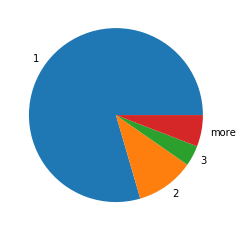

In [5]:
counts = {k: len(v) for k, v in all.items()}
groups = group_counts(counts)
x, y = zip(*groups)
labels = list(x[:3])
labels.append('more')
values = list(y[:3])
values.append(sum(y[3:]))
plt.pie(values, labels=labels)
plt.show()

In [6]:
print("Most popular subjects")
sorted(counts.items(), key=lambda item: item[1], reverse=True)[:20]

Most popular subjects


[(('ddc:610', 'ddc'), 3270),
 (('330 Wirtschaft', 'ddc'), 1881),
 (('ddc:530', 'ddc'), 1660),
 (('ddc:570', 'ddc'), 1212),
 (('510 Mathematik', 'ddc'), 976),
 (('530 Physik', 'ddc'), 974),
 (('ddc:630', 'ddc'), 777),
 (('ddc:540', 'ddc'), 765),
 (('ddc:320', 'ddc'), 581),
 (('620 Ingenieurwissenschaften und zugeordnete Tätigkeiten', 'ddc'), 559),
 (('004 Datenverarbeitung; Informatik', 'ddc'), 488),
 (('ddc:300', 'ddc'), 488),
 (('ddc:550', 'ddc'), 484),
 (('17 Wirtschaft', 'dnb'), 458),
 (('570 Biowissenschaften, Biologie', 'ddc'), 458),
 (('32 Biologie', 'dnb'), 451),
 (('ddc:150', 'ddc'), 433),
 (('29 Physik, Astronomie', 'dnb'), 421),
 (('570 Biowissenschaften; Biologie', 'ddc'), 419),
 (('ddc:330', 'ddc'), 418)]

In [7]:
repos = {'depositonce': depositonce, 'edoc': edoc, 'refubium': refubium}
for repo_str, repo in repos.items():
    cnt = {(item['subject'], item['type']): len(item['values']) for item in repo}
    print(f"Most popular subjects of {repo_str}")
    print(sorted(cnt.items(), key=lambda item: item[1], reverse=True)[:5])

Most popular subjects of depositonce
[(('330 Wirtschaft', 'ddc'), 1881), (('510 Mathematik', 'ddc'), 976), (('530 Physik', 'ddc'), 974), (('620 Ingenieurwissenschaften und zugeordnete Tätigkeiten', 'ddc'), 559), (('004 Datenverarbeitung; Informatik', 'ddc'), 488)]
Most popular subjects of edoc
[(('330 Wirtschaft', 'ddc'), 1762), (('510 Mathematik', 'ddc'), 751), (('530 Physik', 'ddc'), 631), (('17 Wirtschaft', 'dnb'), 458), (('570 Biowissenschaften, Biologie', 'ddc'), 458)]
Most popular subjects of refubium
[(('ddc:610', 'ddc'), 3270), (('ddc:530', 'ddc'), 1660), (('ddc:570', 'ddc'), 1212), (('ddc:630', 'ddc'), 777), (('ddc:540', 'ddc'), 765)]


In [8]:
shared = {'All': [], 'HU-TU': [], 'HU-FU': [], 'TU-FU': []}
for tu_subject in depositonce:
    for hu_subject in edoc:
        if tu_subject['subject'] == hu_subject['subject']:
            shared['HU-TU'].append(tu_subject['subject'])
    for fu_subject in edoc:
        if tu_subject['subject'] == fu_subject['subject']:
            shared['TU-FU'].append(tu_subject['subject'])
for fu_subject in refubium:
    for hu_subject in edoc:
        if fu_subject['subject'] == hu_subject['subject']:
            shared['HU-FU'].append(tu_subject['subject'])
shared['All'] = list(set(shared['HU-TU']).union(set(shared['TU-FU'])))

In [9]:
for key in shared:
    print(key, len(shared[key]))

All 2928
HU-TU 2935
HU-FU 4546
TU-FU 2935
